# Analysis of RMSE and ME in Seasonal Maps

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

## 1. Four seasons (1 year)
### 1.1 Read data table

In [3]:
result_folder = r"../../result/result_v3/"
fn = result_folder+ 'rk_idw_4s.csv'  # Replace 'yourfile.csv' with the path to your CSV file
df = pd.read_csv(fn).drop(columns=['Unnamed: 0'])
df.head()

,WaterBody,Year,Season,Parameter,Filename,NumDataPoints_all,RMSE_idw_all,ME_idw_all,NumDataPoints_con,RMSE_idw_con,ME_idw_con,RMSE_rk,ME_rk,covariates,lowest_RMSE,lowest_abs_ME,processed_by_RK,processed_by_IDW,WaterBody_acr,Parameter_acr
0,Big Bend Seagrasses,2021,Spring,Total Nitrogen,SHP_BBS_TN_mgl_2021_Spring.shp,37,0.192836,-0.010108,0,NaN,NaN,0.225832,-0.015135,bathymetry+LDI,IDW,RK,RK,IDW,BBS,TN_mgl
1,Big Bend Seagrasses,2021,Summer,Total Nitrogen,SHP_BBS_TN_mgl_2021_Summer.shp,33,0.277064,0.000209,0,NaN,NaN,0.209778,0.004748,bathymetry+LDI,RK,IDW,RK,IDW,BBS,TN_mgl
2,Big Bend Seagrasses,2021,Fall,Total Nitrogen,SHP_BBS_TN_mgl_2021_Fall.shp,34,0.176149,-0.023284,0,NaN,NaN,0.177034,-0.011014,bathymetry+LDI,IDW,IDW,RK,IDW,BBS,TN_mgl
3,Big Bend Seagrasses,2021,Winter,Total Nitrogen,SHP_BBS_TN_mgl_2021_Winter.shp,31,0.167782,0.007486,0,NaN,NaN,0.150413,-0.000643,bathymetry+LDI,RK,RK,RK,IDW,BBS,TN_mgl
4,Charlotte Harbor,2017,Spring,Salinity,SHP_CH_Sal_ppt_2017_Spring.shp,402,2.275746,-0.756050,3,0.19019,-3.223500e-07,1.839033,0.062637,bathymetry+LDI+popden+water_flow_wet,RK,IDW,RK,IDW,CH,Sal_ppt


### 1.2 Create acronyms of waterbody names

In [4]:
area_shortnames = {
    'Guana Tolomato Matanzas': 'GTM',
    'Estero Bay': 'EB',
    'Charlotte Harbor': 'CH',
    'Biscayne Bay': 'BB',
    'Big Bend Seagrasses':'BBS'
}

param_shortnames = {
    'Salinity': 'Sal_ppt',
    'Total Nitrogen': 'TN_mgl',
    'Dissolved Oxygen': 'DO_mgl',
    'Turbidity':'Turb_ntu',
    'Secchi Depth':'Secc_m',
    'Water Temperature':'T_c'
}

df['WaterBody_acr'] = df['WaterBody'].map(area_shortnames)
df['Parameter_acr'] = df['Parameter'].map(param_shortnames)

color_scheme1 = ['#1F77B4','#FF930E','gray']

# define font sizes
fsize1,fsize2, fsize3 = 20, 17, 15

### 1.3 Percent of interpolatable seasons

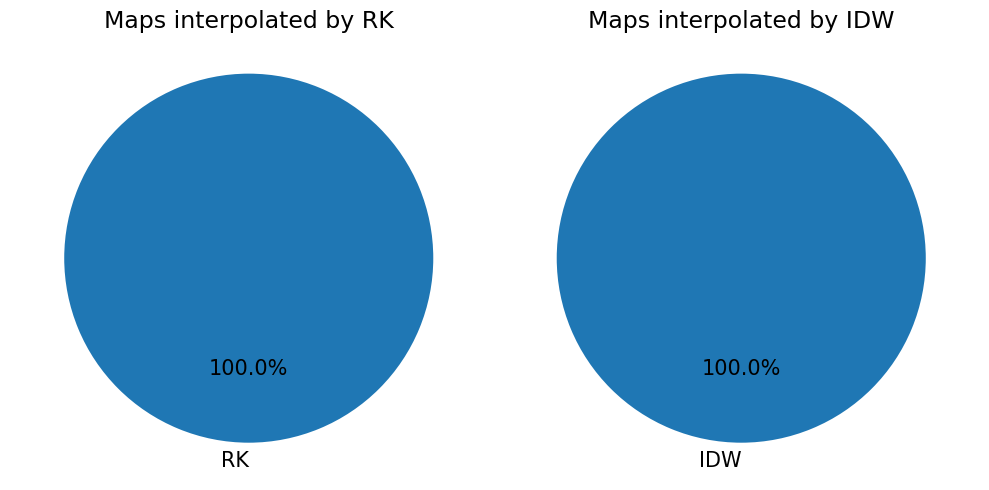

In [5]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# All seasons
category_counts = df['processed_by_RK'].value_counts(dropna=False).sort_index()
axs[0].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, 
           textprops={'fontsize': 15},colors=color_scheme1) # Create a pie chart
axs[0].axis('equal')  # Optional: Equal aspect ratio ensures that pie is drawn as a circle.
axs[0].set_title('Maps interpolated by RK', fontsize=fsize2) # Title

# Seasons with sufficient data
category_counts = df['processed_by_IDW'].value_counts(dropna=False).sort_index()
axs[1].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, 
           textprops={'fontsize': 15},colors=color_scheme1) # Create a pie chart
axs[1].axis('equal')  # Optional: Equal aspect ratio ensures that pie is drawn as a circle.
axs[1].set_title('Maps interpolated by IDW', fontsize=fsize2) # Title


# Display the pie chart
plt.tight_layout()  # Optional: adjusts subplots to fit into the figure area
plt.show()

### 1.4. Comparison between RK and IDW

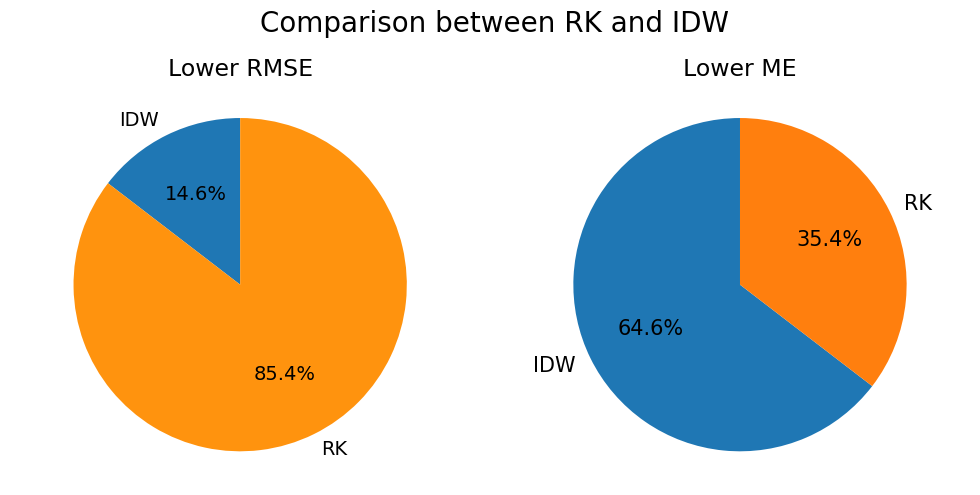

In [6]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# All seasons
category_counts = df['lowest_RMSE'].value_counts().sort_index()
axs[0].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, 
           textprops={'fontsize': 14},colors=color_scheme1) # Create a pie chart
axs[0].axis('equal')  # Optional: Equal aspect ratio ensures that pie is drawn as a circle.
axs[0].set_title('Lower RMSE', fontsize=fsize2) # Title

# All seasons
category_counts = df['lowest_abs_ME'].value_counts().sort_index()
axs[1].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 15}) # Create a pie chart
axs[1].axis('equal')  # Optional: Equal aspect ratio ensures that pie is drawn as a circle.
axs[1].set_title('Lower ME', fontsize=fsize2) # Title

# Set the overall title
fig.suptitle('Comparison between RK and IDW', fontsize=fsize1)

# Display the pie chart
plt.tight_layout()  # Optional: adjusts subplots to fit into the figure area
plt.show()

## 2. 2 Seasons (wet/dry)
### 2.1 Read data

In [77]:
result_folder = r"../../result/result_v3/"
df_idw = pd.read_csv(result_folder + 'TwoSeasons_IDW_All.csv').drop(columns=['index'])
df_rk = pd.read_csv(result_folder + 'TwoSeasons_RK_All.csv')
# Join two dataframes
df = pd.merge(df_idw,df_rk,on = ['WaterBody','Start Year','End Year', 'Seasons', 'Parameter'], how = 'inner', suffixes=('_idw', '_rk'))


In [78]:
df.drop(columns = ['Filename_rk','NumDataPoints_rk'], inplace=True)
df.rename(columns={'Filename_idw': 'Filename', 'NumDataPoints_idw': 'NumDataPoints'}, inplace=True)

### 2.2 Find the method with lower RK and IDW

In [79]:
# Compare RMSE between IDW and RK where only IDW can run
df['lowest_RMSE'] = np.where(
    pd.isna(df['RMSE_idw']) & pd.isna(df['RMSE_rk']), np.nan, # If both A and B are NaN, assign NaN
    np.where(
        pd.isna(df['RMSE_idw']), 'RK',  # If A is NaN but B is not, assign 'y'
        np.where(
            pd.isna(df['RMSE_rk']), 'IDW',  # If B is NaN but A is not, assign 'x'
            np.where(
                df['RMSE_idw'] > df['RMSE_rk'], 'RK', 'IDW'  # If A > B, assign 'x', otherwise assign 'y'
            )
        )
    )
)

# Compare abs ME between IDW and RK in all cases
df['lowest_abs_ME'] = np.where(
    pd.isna(df['ME_idw']) & pd.isna(df['ME_rk']), np.nan, # If both A and B are NaN, assign NaN
    np.where(
        pd.isna(df['ME_idw']), 'RK',  # If A is NaN but B is not, assign 'y'
        np.where(
            pd.isna(df['ME_rk']), 'IDW',  # If B is NaN but A is not, assign 'x'
            np.where(
                df['ME_idw'] > df['ME_rk'], 'RK', 'IDW'  # If A > B, assign 'x', otherwise assign 'y'
            )
        )
    )
)

# Identify seasons interpolated by RK and IDW respectively
df.loc[pd.notna(df['RMSE_rk']), 'processed_by_RK'] = 'RK'
df.loc[pd.notna(df['RMSE_idw']), 'processed_by_IDW'] = 'IDW'

### 2.3 Percent of interpolatable seasons

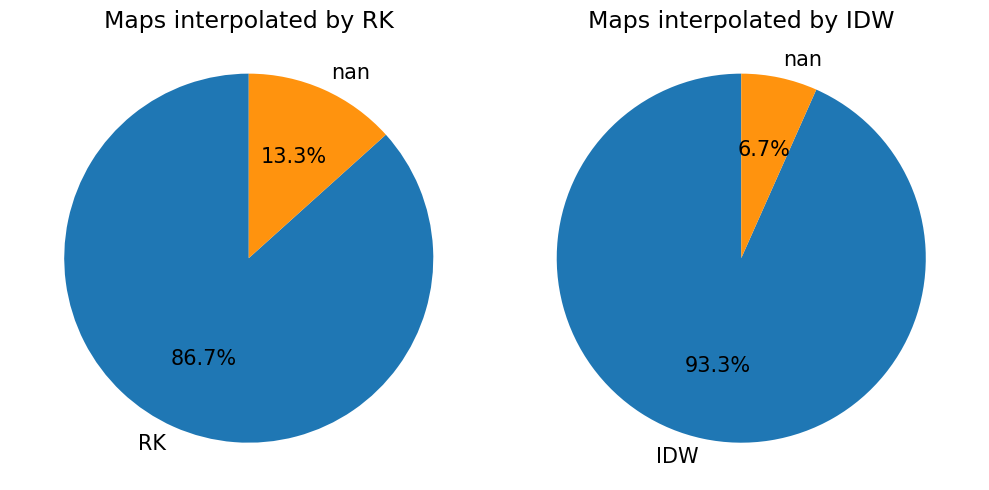

In [80]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# All seasons
category_counts = df['processed_by_RK'].value_counts(dropna=False).sort_index()
axs[0].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, 
           textprops={'fontsize': 15},colors=color_scheme1) # Create a pie chart
axs[0].axis('equal')  # Optional: Equal aspect ratio ensures that pie is drawn as a circle.
axs[0].set_title('Maps interpolated by RK', fontsize=fsize2) # Title

# Seasons with sufficient data
category_counts = df['processed_by_IDW'].value_counts(dropna=False).sort_index()
axs[1].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, 
           textprops={'fontsize': 15},colors=color_scheme1) # Create a pie chart
axs[1].axis('equal')  # Optional: Equal aspect ratio ensures that pie is drawn as a circle.
axs[1].set_title('Maps interpolated by IDW', fontsize=fsize2) # Title


# Display the pie chart
plt.tight_layout()  # Optional: adjusts subplots to fit into the figure area
plt.show()

### 2.4 Create pie charts

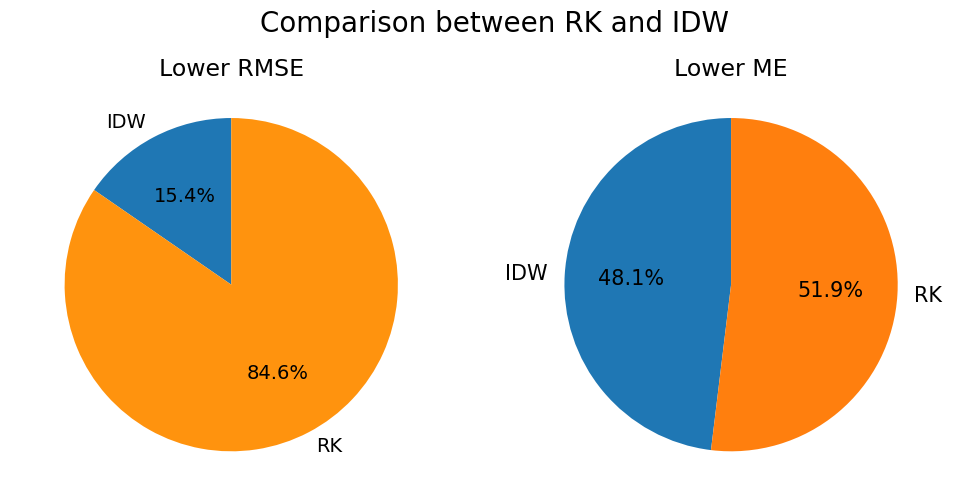

In [10]:
# df = df.dropna(subset=['RMSE_idw','RMSE_rk'], how='all')
df = df.dropna(subset=['RMSE_idw','RMSE_rk'])

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# All seasons
category_counts = df['lowest_RMSE'].value_counts().sort_index()
axs[0].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, 
           textprops={'fontsize': 14},colors=color_scheme1) # Create a pie chart
axs[0].axis('equal')  # Optional: Equal aspect ratio ensures that pie is drawn as a circle.
axs[0].set_title('Lower RMSE', fontsize=fsize2) # Title

# All seasons
category_counts = df['lowest_abs_ME'].value_counts().sort_index()
axs[1].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 15}) # Create a pie chart
axs[1].axis('equal')  # Optional: Equal aspect ratio ensures that pie is drawn as a circle.
axs[1].set_title('Lower ME', fontsize=fsize2) # Title

# Set the overall title
fig.suptitle('Comparison between RK and IDW', fontsize=fsize1)

# Display the pie chart
plt.tight_layout()  # Optional: adjusts subplots to fit into the figure area
plt.show()

## 3. 4 seasons across 2 years
### 3.1 Read data

In [73]:
result_folder = r"../../result/result_v3/"
df_idw = pd.read_csv(result_folder + 'CrossYear_IDW_All.csv')
df_rk = pd.read_csv(result_folder + 'CrossYear_RK_All.csv')
# Join two dataframes
df = pd.merge(df_idw,df_rk,on = ['WaterBody','Season','Year1','Year2','Year3','Parameter','NumDataPoints'], how = 'inner', suffixes=('_idw', '_rk'))
df.drop(columns = ['Filename_rk'])

,WaterBody,Season,Year1,Year2,Year3,Parameter,Filename_idw,NumDataPoints,RMSE_idw,ME_idw,Select_NumDataPoints,RMSE_rk,ME_rk,covariates
0,Charlotte Harbor,Spring,2017,2018,NaN,Total Nitrogen,SHP_CH_TN_mgl_Spring.shp,112.0,0.195032,-0.030048,11.0,0.250309,0.018951,default_covariate
1,Charlotte Harbor,Summer,2016,2017,NaN,Total Nitrogen,SHP_CH_TN_mgl_Summer.shp,100.0,0.411776,-0.018757,100.0,0.370083,-0.000924,default_covariate
2,Charlotte Harbor,Fall,2016,2017,NaN,Total Nitrogen,SHP_CH_TN_mgl_Fall.shp,91.0,0.178622,-0.009329,91.0,0.182629,-0.003453,default_covariate
3,Charlotte Harbor,Winter,2016,2017,2018.0,Total Nitrogen,SHP_CH_TN_mgl_Winter.shp,145.0,0.130621,0.015737,14.0,0.128532,-0.001278,default_covariate
4,Charlotte Harbor,Spring,2017,2018,NaN,Salinity,SHP_CH_Sal_ppt_Spring.shp,410.0,1.863874,-0.028436,41.0,1.920444,0.010554,default_covariate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Biscayne Bay,Winter,2021,2022,2023.0,Secchi Depth,NoData,0.0,NaN,NaN,0.0,NaN,NaN,default_covariate
116,Biscayne Bay,Spring,2022,2023,NaN,Water Temperature,SHP_BB_T_c_Spring.shp,79.0,0.971968,-0.001130,79.0,0.761455,0.012742,default_covariate
117,Biscayne Bay,Summer,2021,2022,NaN,Water Temperature,SHP_BB_T_c_Summer.shp,99.0,1.187012,0.020447,99.0,0.982199,-0.018229,default_covariate
118,Biscayne Bay,Fall,2021,2022,NaN,Water Temperature,SHP_BB_T_c_Fall.shp,97.0,0.660808,-0.024163,97.0,0.639786,-0.027448,default_covariate


### 3.2 Find seasons with lower RMSE and EM

In [74]:
# Compare RMSE between IDW and RK where only IDW can run
df['lowest_RMSE'] = np.where(
    pd.isna(df['RMSE_idw']) & pd.isna(df['RMSE_rk']), np.nan, # If both A and B are NaN, assign NaN
    np.where(
        pd.isna(df['RMSE_idw']), 'RK',  # If A is NaN but B is not, assign 'y'
        np.where(
            pd.isna(df['RMSE_rk']), 'IDW',  # If B is NaN but A is not, assign 'x'
            np.where(
                df['RMSE_idw'] > df['RMSE_rk'], 'RK', 'IDW'  # If A > B, assign 'x', otherwise assign 'y'
            )
        )
    )
)

# Compare abs ME between IDW and RK in all cases
df['lowest_abs_ME'] = np.where(
    pd.isna(df['ME_idw']) & pd.isna(df['ME_rk']), np.nan, # If both A and B are NaN, assign NaN
    np.where(
        pd.isna(df['ME_idw']), 'RK',  # If A is NaN but B is not, assign 'y'
        np.where(
            pd.isna(df['ME_rk']), 'IDW',  # If B is NaN but A is not, assign 'x'
            np.where(
                df['ME_idw'] > df['ME_rk'], 'RK', 'IDW'  # If A > B, assign 'x', otherwise assign 'y'
            )
        )
    )
)

# Identify seasons interpolated by RK and IDW respectively
df.loc[pd.notna(df['RMSE_rk']), 'processed_by_RK'] = 'RK'
df.loc[pd.notna(df['RMSE_idw']), 'processed_by_IDW'] = 'IDW'

### 3.3 Percent of interpolatable seasons

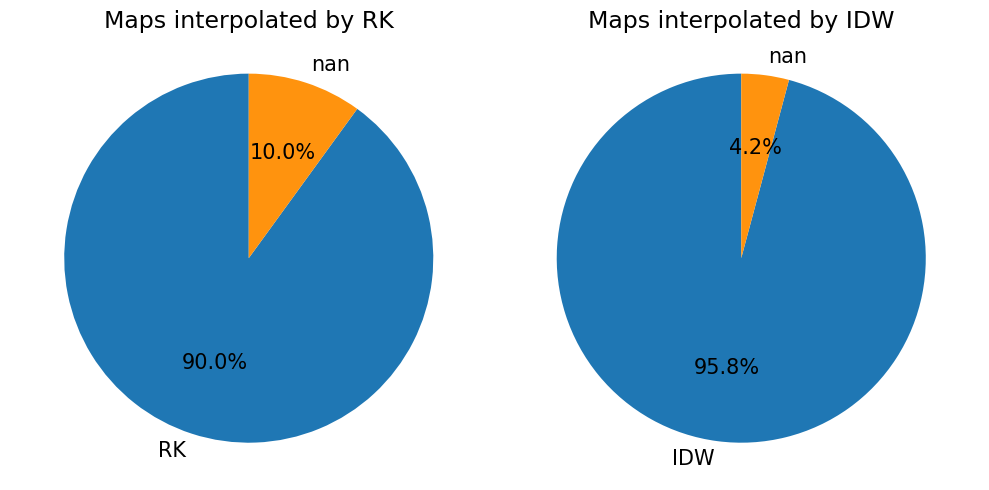

In [75]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# All seasons
category_counts = df['processed_by_RK'].value_counts(dropna=False).sort_index()
axs[0].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, 
           textprops={'fontsize': 15},colors=color_scheme1) # Create a pie chart
axs[0].axis('equal')  # Optional: Equal aspect ratio ensures that pie is drawn as a circle.
axs[0].set_title('Maps interpolated by RK', fontsize=fsize2) # Title

# Seasons with sufficient data
category_counts = df['processed_by_IDW'].value_counts(dropna=False).sort_index()
axs[1].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, 
           textprops={'fontsize': 15},colors=color_scheme1) # Create a pie chart
axs[1].axis('equal')  # Optional: Equal aspect ratio ensures that pie is drawn as a circle.
axs[1].set_title('Maps interpolated by IDW', fontsize=fsize2) # Title


# Display the pie chart
plt.tight_layout()  # Optional: adjusts subplots to fit into the figure area
plt.show()

### 3.4 Create pie charts

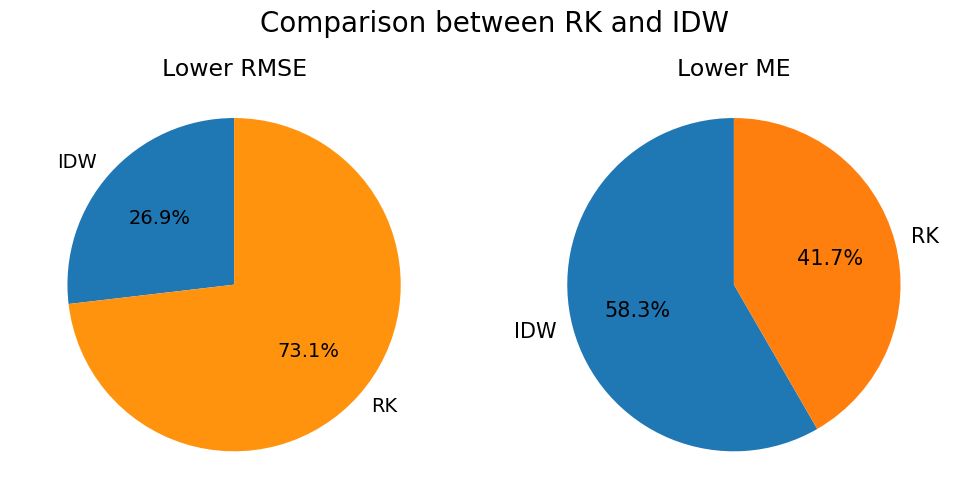

In [76]:
# df = df.dropna(subset=['RMSE_idw','RMSE_rk'], how='all')
df = df.dropna(subset=['RMSE_idw','RMSE_rk'])

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# All seasons
category_counts = df['lowest_RMSE'].value_counts().sort_index()
axs[0].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, 
           textprops={'fontsize': 14},colors=color_scheme1) # Create a pie chart
axs[0].axis('equal')  # Optional: Equal aspect ratio ensures that pie is drawn as a circle.
axs[0].set_title('Lower RMSE', fontsize=fsize2) # Title

# All seasons
category_counts = df['lowest_abs_ME'].value_counts().sort_index()
axs[1].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 15}) # Create a pie chart
axs[1].axis('equal')  # Optional: Equal aspect ratio ensures that pie is drawn as a circle.
axs[1].set_title('Lower ME', fontsize=fsize2) # Title

# Set the overall title
fig.suptitle('Comparison between RK and IDW', fontsize=fsize1)

# Display the pie chart
plt.tight_layout()  # Optional: adjusts subplots to fit into the figure area
plt.show()

# Distributions of ME and RMSE in Monthly and Weekly Maps

## 4. Boxplots of Monthly Maps
### 4.1 Read data

In [15]:
df_m = pd.read_csv(result_folder + 'IDW_Month.csv')
df_w = pd.read_csv(result_folder + 'IDW_Week.csv')

### 4.2 Summary Statistics of the Monthly Data

In [50]:
# Calculate the total number of rows for each Parameter and WbodyAcronym
total_counts = df_m.groupby(['Parameter', 'WbodyAcronym']).size()

# Calculate the number of non-NaN RMSE rows for each Parameter and WbodyAcronym
non_nan_rmse_counts = df_m.dropna(subset=['RMSE']).groupby(['Parameter', 'WbodyAcronym']).size()

# Calculate the percent of non-NaN RMSE rows
percent_non_nan_rmse = (non_nan_rmse_counts / total_counts) * 100

# Reset the index to convert to a long table format
percent_non_nan_rmse = percent_non_nan_rmse.reset_index()
percent_non_nan_rmse.columns = ['Parameter', 'WbodyAcronym', '% interpolatable months']

# Calculate the mean and median ME and RMSE for each Parameter and WbodyAcronym
mean_me = df_m.groupby(['Parameter', 'WbodyAcronym'])['ME'].mean().reset_index()
median_me = df_m.groupby(['Parameter', 'WbodyAcronym'])['ME'].median().reset_index()
mean_rmse = df_m.groupby(['Parameter', 'WbodyAcronym'])['RMSE'].mean().reset_index()
median_rmse = df_m.groupby(['Parameter', 'WbodyAcronym'])['RMSE'].median().reset_index()
mean_num_data_points = df_m.groupby(['Parameter', 'WbodyAcronym'])['NumDataPoints'].mean().reset_index()

# Merge the results into a single dataframe
summary_table = mean_num_data_points.merge(percent_non_nan_rmse, on=['Parameter', 'WbodyAcronym'], how='left')
summary_table = summary_table.merge(mean_me, on=['Parameter', 'WbodyAcronym'], how='left', suffixes=('', '_mean'))
summary_table = summary_table.merge(median_me, on=['Parameter', 'WbodyAcronym'], how='left', suffixes=('', '_median'))
summary_table = summary_table.merge(mean_rmse, on=['Parameter', 'WbodyAcronym'], how='left', suffixes=('', '_mean'))
summary_table = summary_table.merge(median_rmse, on=['Parameter', 'WbodyAcronym'], how='left', suffixes=('', '_median'))

# Rename columns for clarity
summary_table.columns = [
    'Parameter', 'WbodyAcronym', 'Average NumDataPoints', '% interpolatable months',
    'Mean ME', 'Median ME', 'Mean RMSE', 'Median RMSE'
]

# Display the table
summary_table

,Parameter,WbodyAcronym,Average NumDataPoints,% interpolatable months,Mean ME,Median ME,Mean RMSE,Median RMSE
0,Dissolved Oxygen,BB,7.916667,100.000000,-0.075427,-9.665800e-02,0.570937,0.445508
1,Dissolved Oxygen,BBS,1.250000,NaN,NaN,NaN,NaN,NaN
2,Dissolved Oxygen,CH,3.750000,100.000000,0.012548,4.145750e-08,1.176046,1.195583
3,Dissolved Oxygen,EB,4.083333,100.000000,-0.005823,9.215500e-08,0.443083,0.272316
4,Dissolved Oxygen,GTM,5.000000,91.666667,0.121903,7.106336e-02,0.715053,0.586338
5,Salinity,BB,7.916667,100.000000,-0.273383,-3.082749e-01,1.585302,1.359236
6,Salinity,BBS,1.250000,NaN,NaN,NaN,NaN,NaN
7,Salinity,CH,3.916667,100.000000,0.009306,3.344750e-07,1.628410,1.430120
8,Salinity,EB,4.166667,100.000000,-0.043375,4.240917e-02,5.359129,2.910827
9,Salinity,GTM,4.916667,91.666667,0.712808,7.110664e-01,6.486330,7.359328


### 4.3 Summary Statistics of the Weekly Maps

In [52]:
# Calculate the total number of rows for each Parameter and WbodyAcronym
total_counts = df_w.groupby(['Parameter', 'WbodyAcronym']).size()

# Calculate the number of non-NaN RMSE rows for each Parameter and WbodyAcronym
non_nan_rmse_counts = df_w.dropna(subset=['RMSE']).groupby(['Parameter', 'WbodyAcronym']).size()

# Calculate the percent of non-NaN RMSE rows
percent_non_nan_rmse = (non_nan_rmse_counts / total_counts) * 100

# Reset the index to convert to a long table format
percent_non_nan_rmse = percent_non_nan_rmse.reset_index()
percent_non_nan_rmse.columns = ['Parameter', 'WbodyAcronym', '% interpolatable months']

# Calculate the mean and median ME and RMSE for each Parameter and WbodyAcronym
mean_me = df_w.groupby(['Parameter', 'WbodyAcronym'])['ME'].mean().reset_index()
median_me = df_w.groupby(['Parameter', 'WbodyAcronym'])['ME'].median().reset_index()
mean_rmse = df_w.groupby(['Parameter', 'WbodyAcronym'])['RMSE'].mean().reset_index()
median_rmse = df_w.groupby(['Parameter', 'WbodyAcronym'])['RMSE'].median().reset_index()
mean_num_data_points = df_w.groupby(['Parameter', 'WbodyAcronym'])['NumDataPoints'].mean().reset_index()

# Merge the results into a single dataframe
summary_table = mean_num_data_points.merge(percent_non_nan_rmse, on=['Parameter', 'WbodyAcronym'], how='left')
summary_table = summary_table.merge(mean_me, on=['Parameter', 'WbodyAcronym'], how='left', suffixes=('', '_mean'))
summary_table = summary_table.merge(median_me, on=['Parameter', 'WbodyAcronym'], how='left', suffixes=('', '_median'))
summary_table = summary_table.merge(mean_rmse, on=['Parameter', 'WbodyAcronym'], how='left', suffixes=('', '_mean'))
summary_table = summary_table.merge(median_rmse, on=['Parameter', 'WbodyAcronym'], how='left', suffixes=('', '_median'))

# Rename columns for clarity
summary_table.columns = [
    'Parameter', 'WbodyAcronym', 'Average NumDataPoints', '% interpolatable months',
    'Mean ME', 'Median ME', 'Mean RMSE', 'Median RMSE'
]

# Display the table
summary_table

,Parameter,WbodyAcronym,Average NumDataPoints,% interpolatable months,Mean ME,Median ME,Mean RMSE,Median RMSE
0,Dissolved Oxygen,BB,5.961538,100.000000,-9.032828e-02,-1.096874e-01,0.478870,0.416779
1,Dissolved Oxygen,BBS,0.980769,NaN,NaN,NaN,NaN,NaN
2,Dissolved Oxygen,CH,2.865385,73.076923,1.538421e-06,3.923000e-08,1.078294,0.606313
3,Dissolved Oxygen,EB,3.000000,86.538462,-4.137171e-03,-1.447368e-02,0.627798,0.434400
4,Dissolved Oxygen,GTM,3.596154,84.615385,1.720322e-01,1.684717e-01,0.927295,0.743790
5,Salinity,BB,5.923077,100.000000,-3.565464e-01,-4.170504e-01,0.964601,0.923987
6,Salinity,BBS,0.980769,NaN,NaN,NaN,NaN,NaN
7,Salinity,CH,3.211538,96.153846,3.323692e-07,-1.220000e-08,1.452196,1.148171
8,Salinity,EB,3.096154,92.307692,2.063531e-01,1.310590e-01,6.203686,4.400157
9,Salinity,GTM,3.538462,78.846154,1.066574e+00,9.078879e-01,7.743078,7.890530


### 4.4 Boxplots of RMSE of Monthly Data

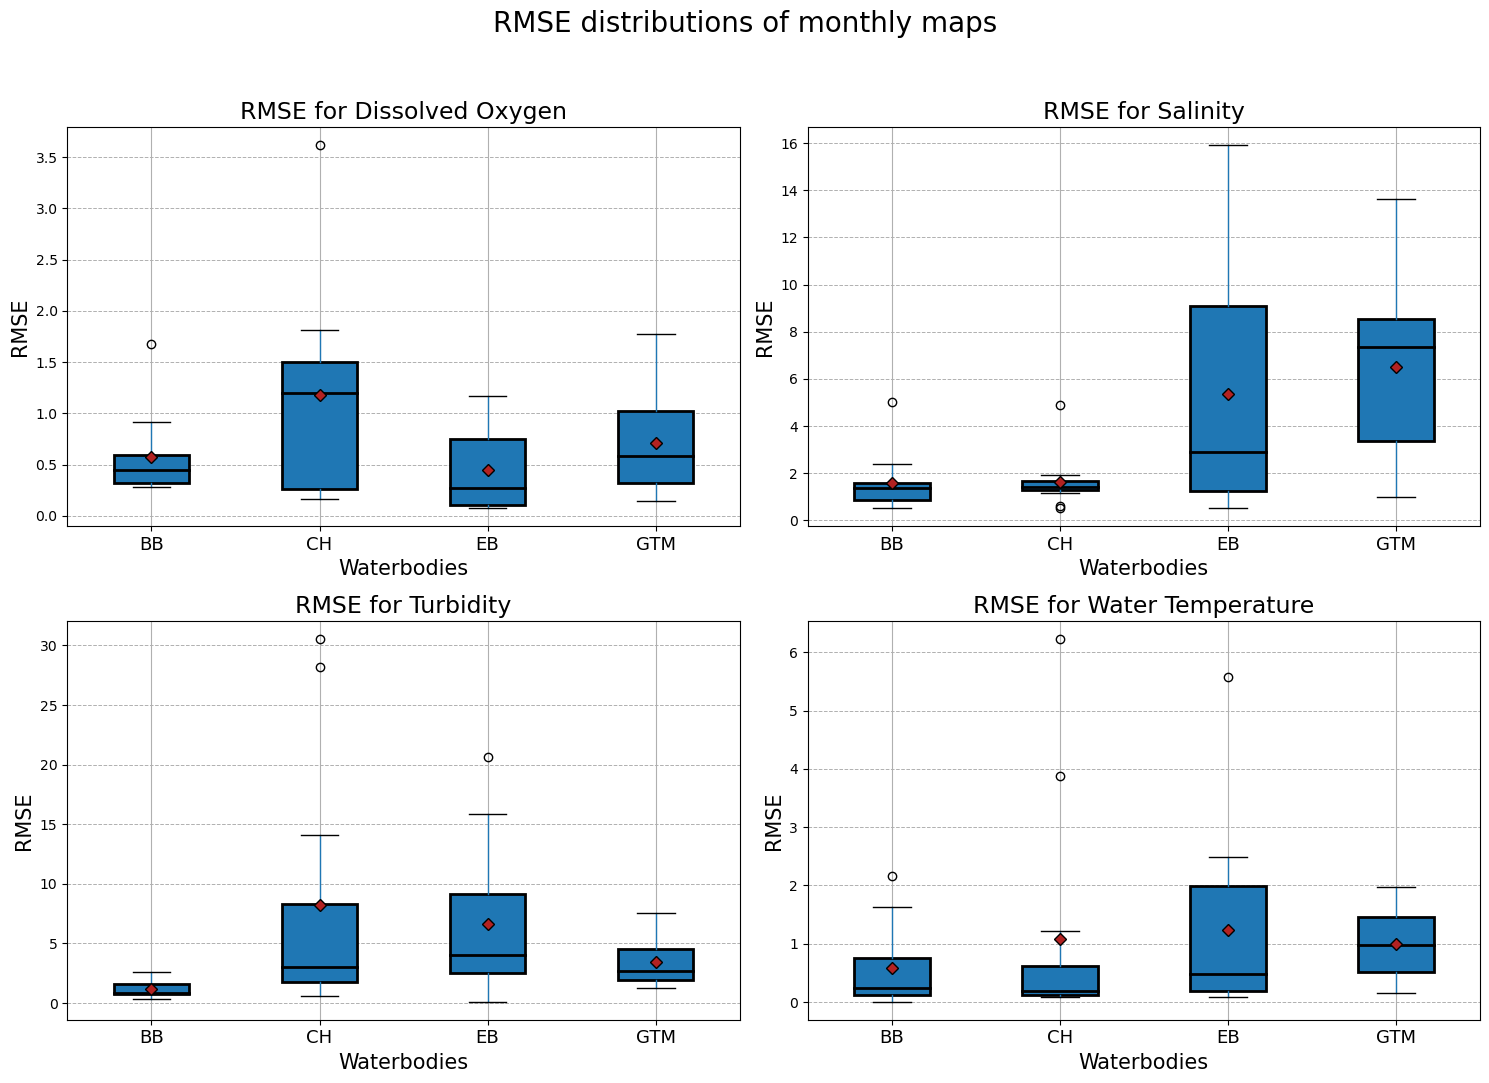

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Define font sizes
fsize1, fsize2, fsize3, fsize4 = 20, 17, 15, 13

# Filter out rows where RMSE is NaN
df_filtered = df_m.dropna(subset=['RMSE'])

# Separate the boxplots into different plots for each Parameter
unique_parameters = df_filtered['Parameter'].unique()

# Set up the 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(15, 11))
axes = axes.flatten()

for idx, parameter in enumerate(unique_parameters):
    subset = df_filtered[df_filtered['Parameter'] == parameter]
    
    boxprops = dict(linestyle='-', linewidth=2, color='k')  # Customizing the box border
    meanprops = dict(marker='D', markeredgecolor='black', markerfacecolor='firebrick')  # Customizing the mean marker
    medianprops = dict(linestyle='-', linewidth=2, color='black')  # Customizing the median line color
    
    subset.boxplot(column='RMSE', by='WbodyAcronym', ax=axes[idx], 
                   boxprops=boxprops, showmeans=True, meanprops=meanprops, 
                   meanline=False, medianprops=medianprops, patch_artist=True)
    
    axes[idx].set_title(f'RMSE for {parameter}', fontsize=fsize2)
    axes[idx].set_ylabel('RMSE', fontsize=fsize3)
    axes[idx].set_xlabel('Waterbodies', fontsize=fsize3)
    axes[idx].tick_params(axis='x', labelsize=fsize4)  # Set x tick mark font size
    axes[idx].grid(axis='y', linestyle='--', linewidth=0.7)  # Add horizontal grid lines

fig.suptitle('RMSE distributions of monthly maps', fontsize=fsize1)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make room for suptitle


# Save the combined plot
# plt.savefig('/mnt/data/rmse_boxplots_combined.png')

# Show the plot
plt.show()

### 4.4 Boxplots of ME of Monthly Data

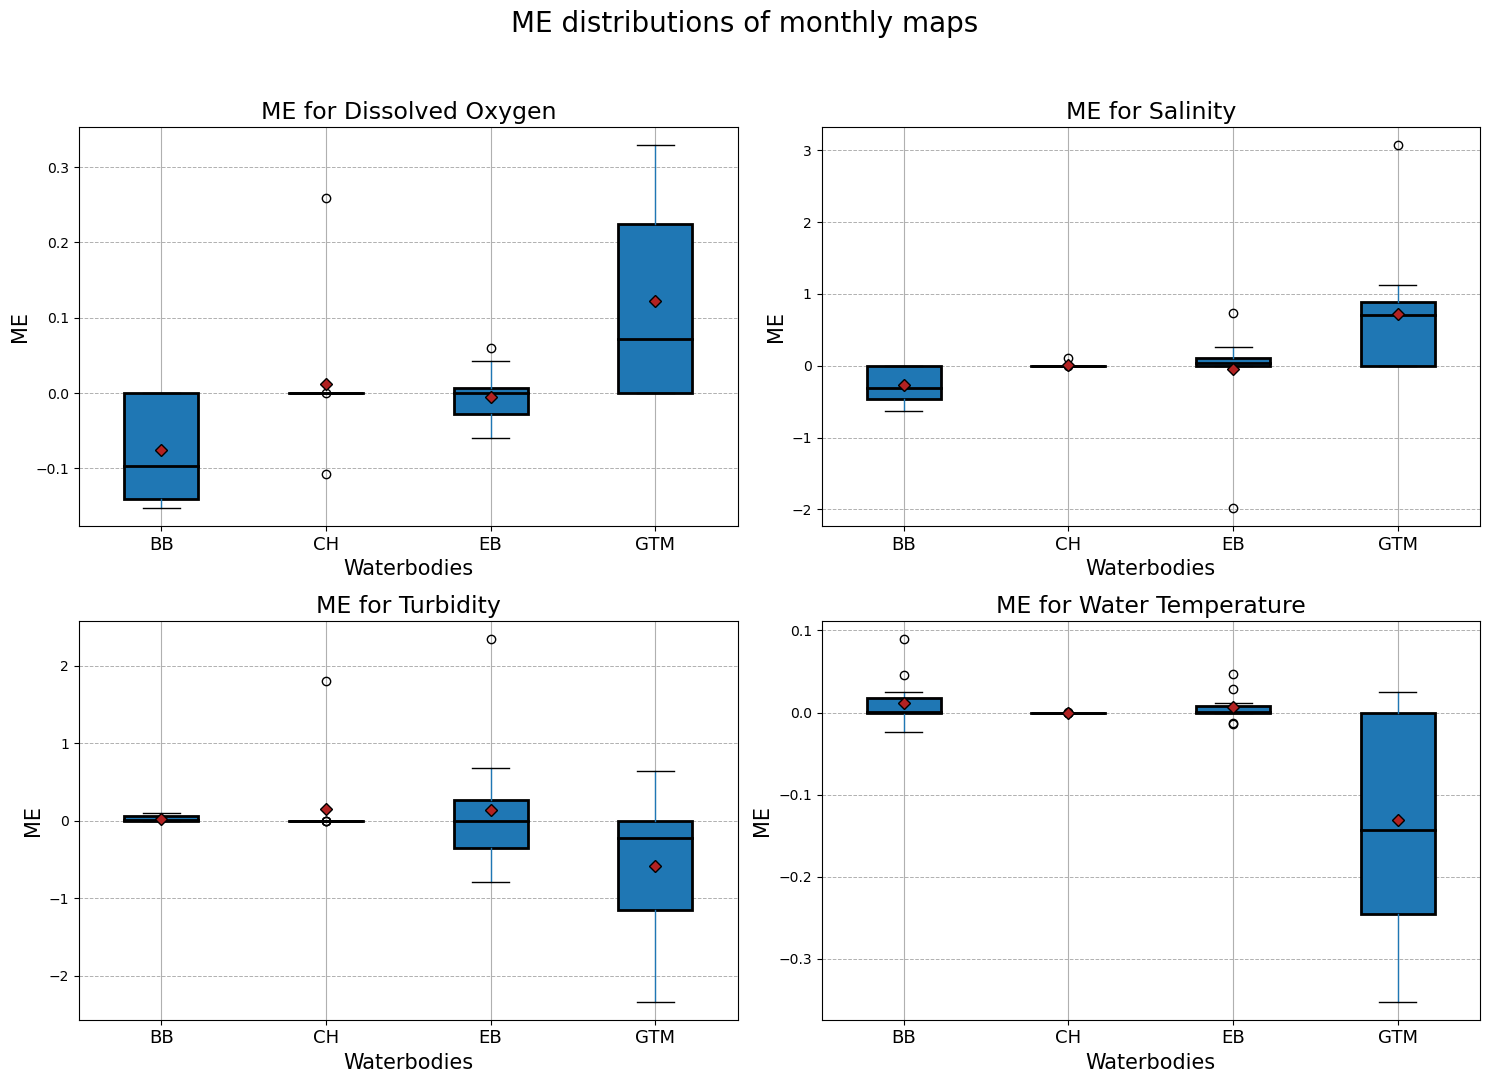

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Define font sizes
fsize1, fsize2, fsize3, fsize4 = 20, 17, 15, 13

# Filter out rows where RMSE is NaN
df_filtered = df_m.dropna(subset=['ME'])

# Separate the boxplots into different plots for each Parameter
unique_parameters = df_filtered['Parameter'].unique()

# Set up the 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(15, 11))
axes = axes.flatten()

for idx, parameter in enumerate(unique_parameters):
    subset = df_filtered[df_filtered['Parameter'] == parameter]
    
    boxprops = dict(linestyle='-', linewidth=2, color='k')  # Customizing the box border
    meanprops = dict(marker='D', markeredgecolor='black', markerfacecolor='firebrick')  # Customizing the mean marker
    medianprops = dict(linestyle='-', linewidth=2, color='black')  # Customizing the median line color
    
    subset.boxplot(column='ME', by='WbodyAcronym', ax=axes[idx], 
                   boxprops=boxprops, showmeans=True, meanprops=meanprops, 
                   meanline=False, medianprops=medianprops, patch_artist=True)
    
    axes[idx].set_title(f'ME for {parameter}', fontsize=fsize2)
    axes[idx].set_ylabel('ME', fontsize=fsize3)
    axes[idx].set_xlabel('Waterbodies', fontsize=fsize3)
    axes[idx].tick_params(axis='x', labelsize=fsize4)  # Set x tick mark font size
    axes[idx].grid(axis='y', linestyle='--', linewidth=0.7)  # Add horizontal grid lines

fig.suptitle('ME distributions of monthly maps', fontsize=fsize1)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make room for suptitle


# Save the combined plot
# plt.savefig('/mnt/data/rmse_boxplots_combined.png')

# Show the plot
plt.show()

### 4.5 Boxplots of RMSE of Weekly Data

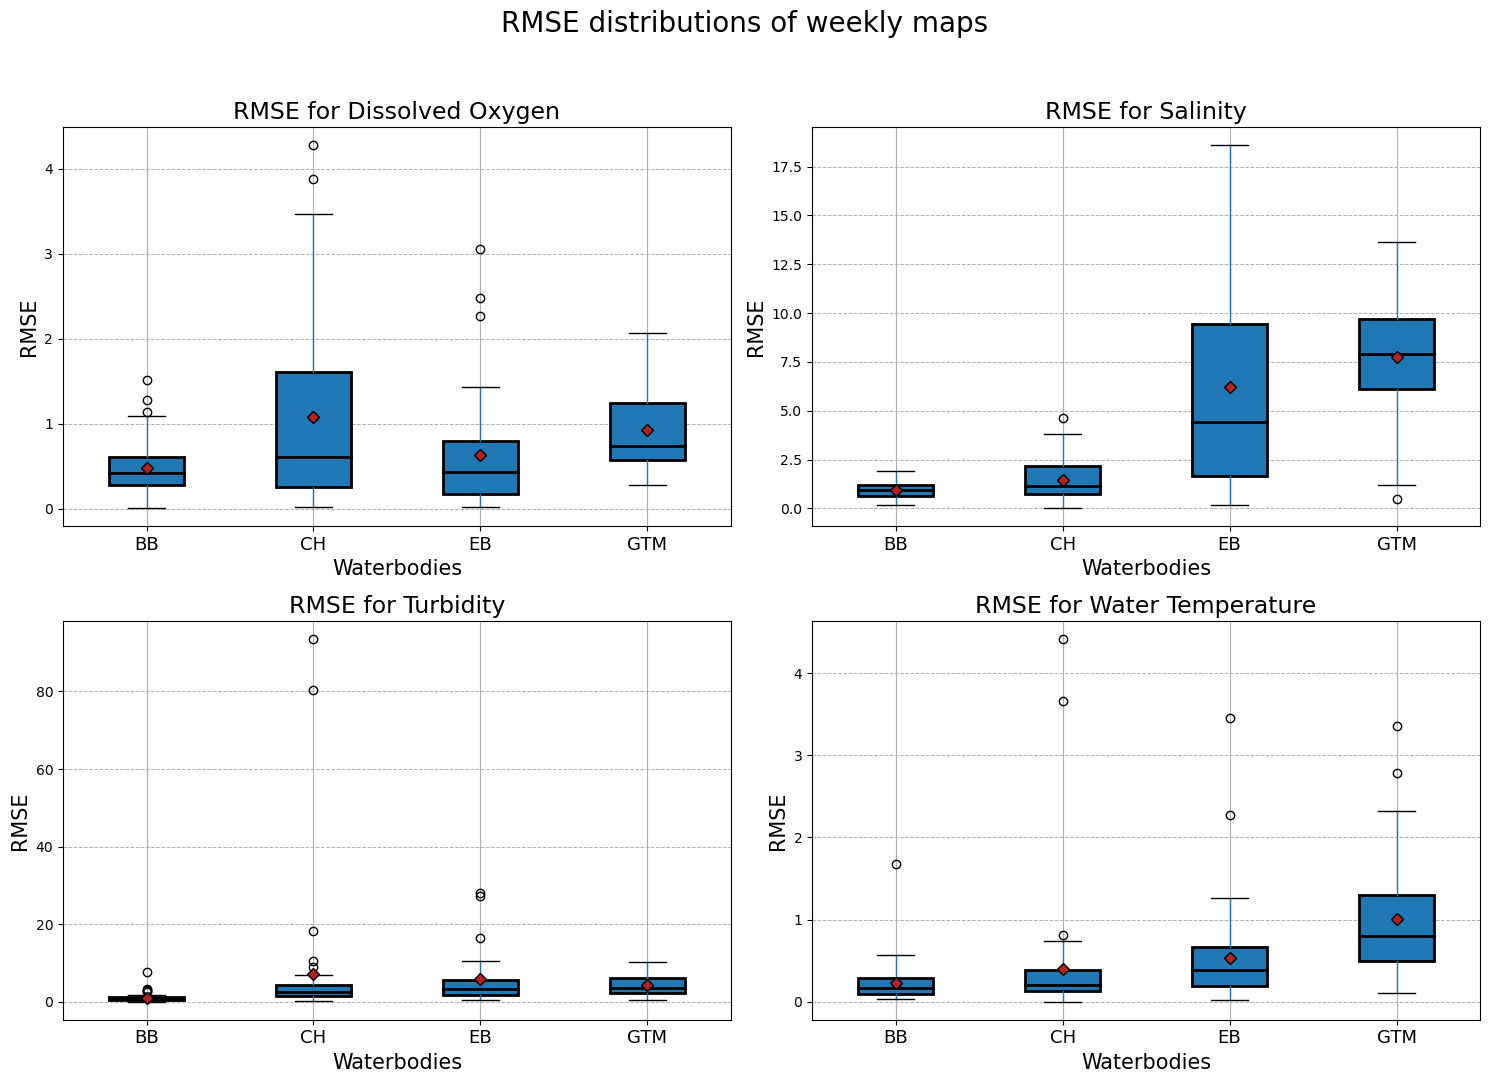

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Define font sizes
fsize1, fsize2, fsize3, fsize4 = 20, 17, 15, 13

# Filter out rows where RMSE is NaN
df_filtered = df_w.dropna(subset=['RMSE'])

# Separate the boxplots into different plots for each Parameter
unique_parameters = df_filtered['Parameter'].unique()

# Set up the 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(15, 11))
axes = axes.flatten()

for idx, parameter in enumerate(unique_parameters):
    subset = df_filtered[df_filtered['Parameter'] == parameter]
    
    boxprops = dict(linestyle='-', linewidth=2, color='k')  # Customizing the box border
    meanprops = dict(marker='D', markeredgecolor='black', markerfacecolor='firebrick')  # Customizing the mean marker
    medianprops = dict(linestyle='-', linewidth=2, color='black')  # Customizing the median line color
    
    subset.boxplot(column='RMSE', by='WbodyAcronym', ax=axes[idx], 
                   boxprops=boxprops, showmeans=True, meanprops=meanprops, 
                   meanline=False, medianprops=medianprops, patch_artist=True)
    
    axes[idx].set_title(f'RMSE for {parameter}', fontsize=fsize2)
    axes[idx].set_ylabel('RMSE', fontsize=fsize3)
    axes[idx].set_xlabel('Waterbodies', fontsize=fsize3)
    axes[idx].tick_params(axis='x', labelsize=fsize4)  # Set x tick mark font size
    axes[idx].grid(axis='y', linestyle='--', linewidth=0.7)  # Add horizontal grid lines

fig.suptitle('RMSE distributions of weekly maps', fontsize=fsize1)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make room for suptitle


# Save the combined plot
# plt.savefig('/mnt/data/rmse_boxplots_combined.png')

# Show the plot
plt.show()

### 4.6 Boxplots of ME of Weekly Data

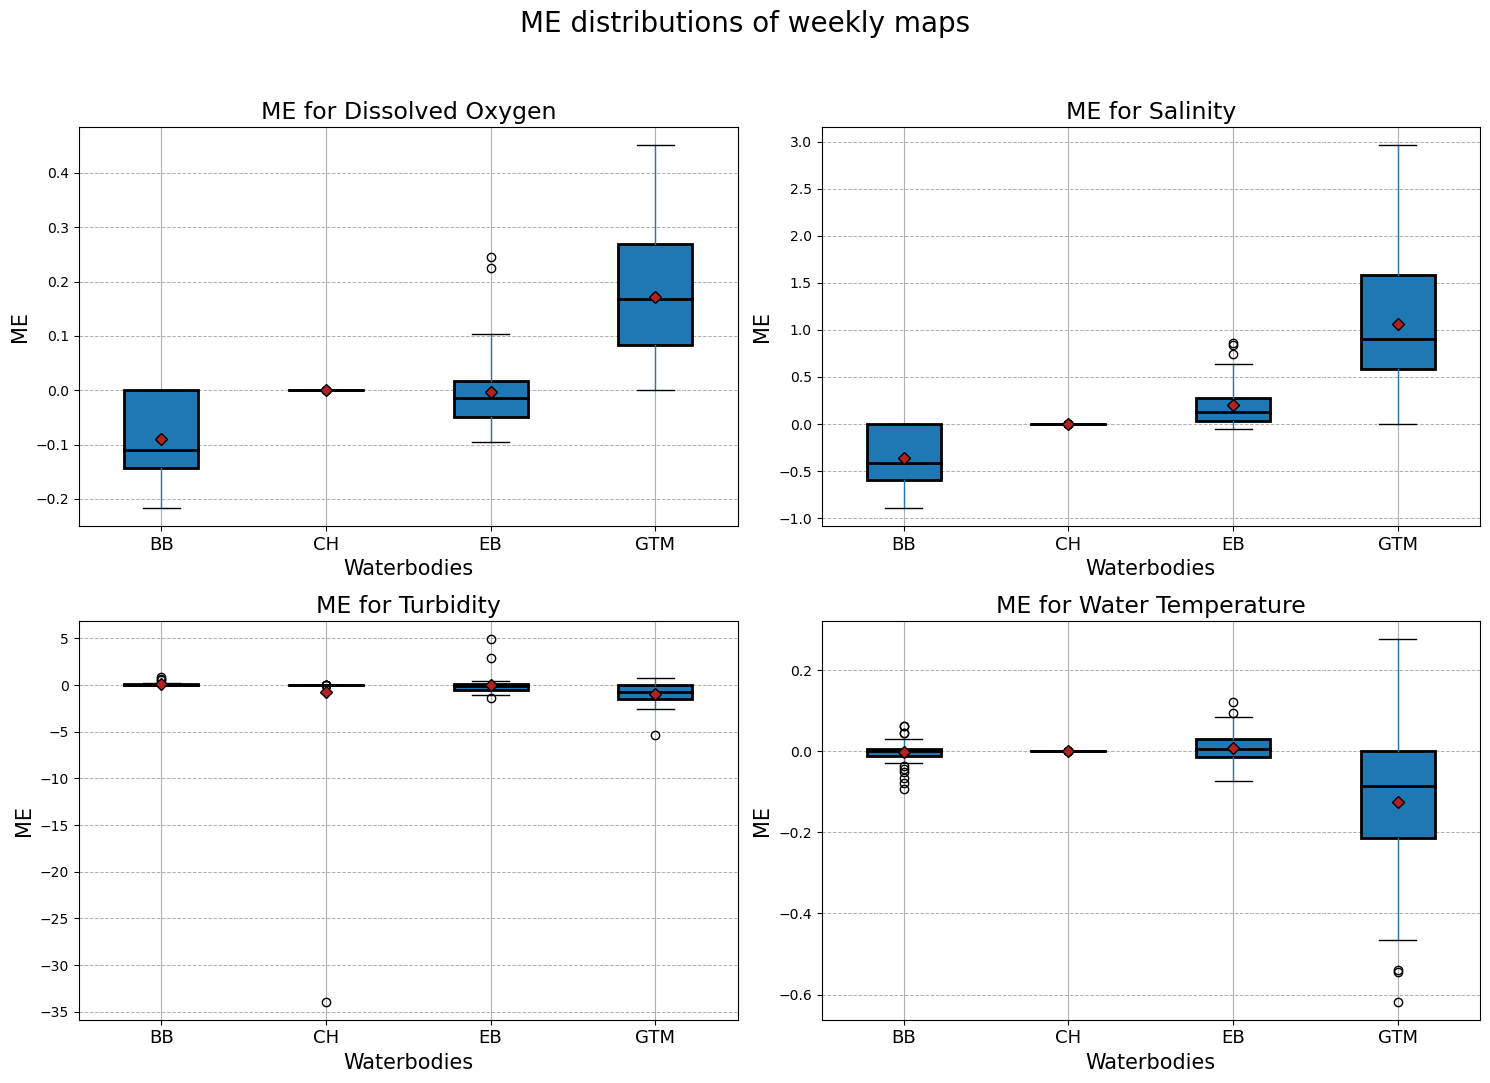

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Define font sizes
fsize1, fsize2, fsize3, fsize4 = 20, 17, 15, 13

# Filter out rows where RMSE is NaN
df_filtered = df_w.dropna(subset=['ME'])

# Separate the boxplots into different plots for each Parameter
unique_parameters = df_filtered['Parameter'].unique()

# Set up the 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(15, 11))
axes = axes.flatten()

for idx, parameter in enumerate(unique_parameters):
    subset = df_filtered[df_filtered['Parameter'] == parameter]
    
    boxprops = dict(linestyle='-', linewidth=2, color='k')  # Customizing the box border
    meanprops = dict(marker='D', markeredgecolor='black', markerfacecolor='firebrick')  # Customizing the mean marker
    medianprops = dict(linestyle='-', linewidth=2, color='black')  # Customizing the median line color
    
    subset.boxplot(column='ME', by='WbodyAcronym', ax=axes[idx], 
                   boxprops=boxprops, showmeans=True, meanprops=meanprops, 
                   meanline=False, medianprops=medianprops, patch_artist=True)
    
    axes[idx].set_title(f'ME for {parameter}', fontsize=fsize2)
    axes[idx].set_ylabel('ME', fontsize=fsize3)
    axes[idx].set_xlabel('Waterbodies', fontsize=fsize3)
    axes[idx].tick_params(axis='x', labelsize=fsize4)  # Set x tick mark font size
    axes[idx].grid(axis='y', linestyle='--', linewidth=0.7)  # Add horizontal grid lines

fig.suptitle('ME distributions of weekly maps', fontsize=fsize1)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make room for suptitle


# Save the combined plot
# plt.savefig('/mnt/data/rmse_boxplots_combined.png')

# Show the plot
plt.show()